### Import

In [2]:
import numpy as np
import functions_eq_mag as fc
import functions_fatiando as ft
from timeit import default_timer as time
from scipy.interpolate import griddata
from scipy import interpolate, signal
import pickle as pickle
from matplotlib import pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

### Observed Grid and Data

In [3]:
with open('synthetic_regular_tf.pickle', 'rb') as r:
    synthetic_regular_tf = pickle.load(r)

with open('synthetic_irregular_20_tf.pickle', 'rb') as r:
    synthetic_irregular_20_tf = pickle.load(r)

with open('synthetic_irregular_30_tf.pickle', 'rb') as r:
    synthetic_irregular_30_tf = pickle.load(r)

with open('synthetic_irregular_z05_tf.pickle', 'rb') as r:
    synthetic_irregular_z05_tf = pickle.load(r)

with open('synthetic_irregular_z10_tf.pickle', 'rb') as r:
    synthetic_irregular_z10_tf = pickle.load(r)

In [4]:
xi_plot = synthetic_regular_tf['x']
yi_plot = synthetic_regular_tf['y']
zi = synthetic_regular_tf['z']
tf = synthetic_regular_tf['tf']
shape = (100, 50)
N = shape[0]*shape[1]

In [5]:
print (1)
print (np.mean(np.abs(synthetic_regular_tf['delta_tf'])))
print (np.std(np.abs(synthetic_regular_tf['delta_tf'])))
print()
print (np.mean(np.abs(synthetic_regular_tf['delta_tf_bccb'])))
print (np.std(np.abs(synthetic_regular_tf['delta_tf_bccb'])))
print()
print(2)
print (np.mean(np.abs(synthetic_irregular_20_tf['delta_tf'])))
print (np.std(np.abs(synthetic_irregular_20_tf['delta_tf'])))
print()
print (np.mean(np.abs(synthetic_irregular_20_tf['delta_tf_bccb'])))
print (np.std(np.abs(synthetic_irregular_20_tf['delta_tf_bccb'])))
print()
print(3)
print (np.mean(np.abs(synthetic_irregular_30_tf['delta_tf'])))
print (np.std(np.abs(synthetic_irregular_30_tf['delta_tf'])))
print()
print (np.mean(np.abs(synthetic_irregular_30_tf['delta_tf_bccb'])))
print (np.std(np.abs(synthetic_irregular_30_tf['delta_tf_bccb'])))
print()
print(4)
print (np.mean(np.abs(synthetic_irregular_z05_tf['delta_tf'])))
print (np.std(np.abs(synthetic_irregular_z05_tf['delta_tf'])))
print()
print (np.mean(np.abs(synthetic_irregular_z05_tf['delta_tf_bccb'])))
print (np.std(np.abs(synthetic_irregular_z05_tf['delta_tf_bccb'])))
print()
print(5)
print (np.mean(np.abs(synthetic_irregular_z10_tf['delta_tf'])))
print (np.std(np.abs(synthetic_irregular_z10_tf['delta_tf'])))
print()
print (np.mean(np.abs(synthetic_irregular_z10_tf['delta_tf_bccb'])))
print (np.std(np.abs(synthetic_irregular_z10_tf['delta_tf_bccb'])))

1
0.1194092550862498
0.3143771541033596

0.8905153118418322
1.3847863644226273

2
0.40843257407013456
0.3861896768832671

1.3125474287196122
1.7187367630185733

3
0.4069510133057453
0.38985202131910435

1.5128909098262298
1.852554818967075

4
0.43162807051550656
0.4762055601337375

2.106870488666706
2.502307595838646

5
0.48189314641893555
0.6564580928950187

3.49807180054668
3.8152737440672704


In [6]:
scale_max = np.max(synthetic_irregular_z10_tf['delta_tf_bccb'])
scale_min = np.min(synthetic_irregular_z10_tf['delta_tf_bccb'])
print (scale_min, scale_max)
scale_max = 42.
scale_min = -27.

-26.619794498934407 41.414854810135395


### Plot of the Figure 2 synthetic data

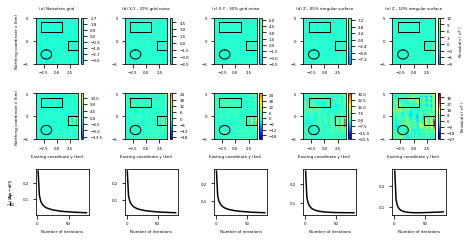

In [8]:
#Projection_model 
R = 1000 #Radius
xc, yc, zc = -3000.,-2000.,2000. #Center of sphere
phi = np.linspace(0, 2.*np.pi, 36)  #36 points
x = xc/1000 + R/1000*np.cos(phi)
y = yc/1000 + R/1000*np.sin(phi)

x_p = [-3., -3, 1, 1, -3.]
y_p = [2., 4, 4, 2, 2.]

x_p2 = [2, 2, 6, 6, 2]
y_p2 = [-2, 0, 0, -2, -2.]

height= 13.
width = 25.
height_per_width = height/width
fig = plt.figure(figsize=(6.66,6.66*height_per_width))
fig.patch.set_facecolor('xkcd:white')

plt.subplot(351)
plt.title('(a) Noiseless grid', y=1.05, x=0.5, fontsize=4)
plt.tricontourf(yi_plot, xi_plot,synthetic_regular_tf['delta_tf'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=1)
plt.plot(x_p2,y_p2,color="k", linewidth=1)
plt.plot(y, x, color="k", linewidth=1)
cb = plt.colorbar(shrink=1)
cb.ax.tick_params(labelsize=4)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=4)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
#plt.xlabel('Easting coordinate y (km)', fontsize=4)
plt.ylabel('Northing coordinate x (km)', fontsize=4)

plt.subplot(356)
#plt.title('(b)', y=0.91, x=-0.15, fontsize=4)
plt.tricontourf(yi_plot, xi_plot,synthetic_regular_tf['delta_tf_bccb'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=1)
plt.plot(x_p2,y_p2,color="k", linewidth=1)
plt.plot(y, x, color="k", linewidth=1)
cb = plt.colorbar(shrink=1)
cb.ax.tick_params(labelsize=4)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=4)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
plt.xlabel('Easting coordinate y (km)', fontsize=4)
plt.ylabel('Northing coordinate x (km)', fontsize=4)

plt.subplot(3,5,11)
#plt.title('(c)', y=0.91, x=-0.16, fontsize=4)
plt.plot(synthetic_regular_tf['itmax'], synthetic_regular_tf['res_list_ls'], 'k-')
plt.xlabel('Number of iterations', fontsize=4)
plt.ylabel('$\dfrac{1}{N} \,\,||\mathbf{A} \~{\mathbf{p}} - \mathbf{d}^o||$', fontsize=4)
#plt.legend(loc='best', fontsize=4)
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
#plt.xlabel('Easting coordinate y (km)', fontsize=4)
#plt.ylabel('Northing coordinate x (km)', fontsize=4)

plt.subplot(352)
plt.title('(b) X,Y - 20% grid noise', y=1.05, x=0.5, fontsize=4)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_20_tf['delta_tf'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=1)
plt.plot(x_p2,y_p2,color="k", linewidth=1)
plt.plot(y, x, color="k", linewidth=1)
cb = plt.colorbar(shrink=1)
cb.ax.tick_params(labelsize=4)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=4)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
#plt.xlabel('Easting coordinate y (km)', fontsize=4)
#plt.ylabel('Northing coordinate x (km)', fontsize=4)

plt.subplot(357)
#plt.title('(e)', y=0.91, x=-0.15, fontsize=4)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_20_tf['delta_tf_bccb'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=1)
plt.plot(x_p2,y_p2,color="k", linewidth=1)
plt.plot(y, x, color="k", linewidth=1)
cb = plt.colorbar(shrink=1)
cb.ax.tick_params(labelsize=4)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=4)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
plt.xlabel('Easting coordinate y (km)', fontsize=4)
#plt.ylabel('Northing coordinate x (km)', fontsize=4)

plt.subplot(3,5,12)
#plt.title('(f)', y=0.91, x=-0.15, fontsize=4)
plt.plot(synthetic_irregular_20_tf['itmax'], synthetic_irregular_20_tf['res_list_ls'], 'k-')
plt.xlabel('Number of iterations', fontsize=4)
#plt.ylabel('$\dfrac{1}{N} \,\,||\mathbf{A} \~{\mathbf{p}} - \mathbf{d}^o||$', fontsize=4)
#plt.legend(loc='best', fontsize=4)
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
#plt.xlabel('Easting coordinate y (km)', fontsize=4)
#plt.ylabel('Northing coordinate x (km)', fontsize=4)

plt.subplot(353)
plt.title('(c) X,Y - 30% grid noise', y=1.05, x=0.5, fontsize=4)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_30_tf['delta_tf'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=1)
plt.plot(x_p2,y_p2,color="k", linewidth=1)
plt.plot(y, x, color="k", linewidth=1)
cb = plt.colorbar(shrink=1)
cb.ax.tick_params(labelsize=4)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=4)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
#plt.xlabel('Easting coordinate y (km)', fontsize=4)
#plt.ylabel('Northing coordinate x (km)', fontsize=4)

plt.subplot(358)
#plt.title('(h)', y=0.91, x=-0.15, fontsize=4)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_30_tf['delta_tf_bccb'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=1)
plt.plot(x_p2,y_p2,color="k", linewidth=1)
plt.plot(y, x, color="k", linewidth=1)
cb = plt.colorbar(shrink=1)
cb.ax.tick_params(labelsize=4)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=4)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
plt.xlabel('Easting coordinate y (km)', fontsize=4)
#plt.ylabel('Northing coordinate x (km)', fontsize=4)

plt.subplot(3,5,13)
#plt.title('(i)', y=0.91, x=-0.15, fontsize=4)
plt.plot(synthetic_irregular_30_tf['itmax'], synthetic_irregular_30_tf['res_list_ls'], 'k-')
plt.xlabel('Number of iterations', fontsize=4)
#plt.ylabel('$\dfrac{1}{N} \,\,||\mathbf{A} \~{\mathbf{p}} - \mathbf{d}^o||$', fontsize=4)
#plt.legend(loc='best', fontsize=4)
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
#plt.xlabel('Easting coordinate y (km)', fontsize=4)
#plt.ylabel('Northing coordinate x (km)', fontsize=4)

plt.subplot(3,5,4)
plt.title('(d) Z - 05% irregular surface', y=1.05, x=0.5, fontsize=4)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_z05_tf['delta_tf'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=1)
plt.plot(x_p2,y_p2,color="k", linewidth=1)
plt.plot(y, x, color="k", linewidth=1)
cb = plt.colorbar(shrink=1)
cb.ax.tick_params(labelsize=4)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=4)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
#plt.xlabel('Easting coordinate y (km)', fontsize=4)
#plt.ylabel('Northing coordinate x (km)', fontsize=4)

plt.subplot(3,5,9)
#plt.title('(k)', y=0.91, x=-0.15, fontsize=4)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_z05_tf['delta_tf_bccb'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=1)
plt.plot(x_p2,y_p2,color="k", linewidth=1)
plt.plot(y, x, color="k", linewidth=1)
cb = plt.colorbar(shrink=1)
cb.ax.tick_params(labelsize=4)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=4)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
plt.xlabel('Easting coordinate y (km)', fontsize=4)
#plt.ylabel('Northing coordinate x (km)', fontsize=4)

plt.subplot(3,5,14)
#plt.title('(l)', y=0.91, x=-0.15, fontsize=4)
plt.plot(synthetic_irregular_z05_tf['itmax'], synthetic_irregular_z05_tf['res_list_ls'], 'k-')
plt.xlabel('Number of iterations', fontsize=4)
#plt.ylabel('$\dfrac{1}{N} \,\,||\mathbf{A} \~{\mathbf{p}} - \mathbf{d}^o||$', fontsize=4)
#plt.legend(loc='best', fontsize=4)
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
#plt.xlabel('Easting coordinate y (km)', fontsize=4)
#plt.ylabel('Northing coordinate x (km)', fontsize=4)

plt.subplot(3,5,5)
plt.title('(e) Z - 10% irregular surface', y=1.05, x=0.5, fontsize=4)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_z10_tf['delta_tf'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=1)
plt.plot(x_p2,y_p2,color="k", linewidth=1)
plt.plot(y, x, color="k", linewidth=1)
cb = plt.colorbar(shrink=1)
cb.ax.tick_params(labelsize=4)
cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=4)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
#plt.xlabel('Easting coordinate y (km)', fontsize=4)
#plt.ylabel('Northing coordinate x (km)', fontsize=4)

plt.subplot(3,5,10)
#plt.title('(n)', y=0.91, x=-0.15, fontsize=4)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_z10_tf['delta_tf_bccb'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=1)
plt.plot(x_p2,y_p2,color="k", linewidth=1)
plt.plot(y, x, color="k", linewidth=1)
cb = plt.colorbar(shrink=1)
cb.ax.tick_params(labelsize=4)
cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=4)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
plt.xlabel('Easting coordinate y (km)', fontsize=4)
#plt.ylabel('Northing coordinate x (km)', fontsize=4)

plt.subplot(3,5,15)
#plt.title('(o)', y=0.91, x=-0.15, fontsize=4)
plt.plot(synthetic_irregular_z10_tf['itmax'], synthetic_irregular_z10_tf['res_list_ls'], 'k-')
plt.xlabel('Number of iterations', fontsize=4)
#plt.ylabel('$\dfrac{1}{N} \,\,||\mathbf{A} \~{\mathbf{p}} - \mathbf{d}^o||$', fontsize=4)
#plt.legend(loc='best', fontsize=4)
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
#plt.xlabel('Easting coordinate y (km)', fontsize=4)
#plt.ylabel('Northing coordinate x (km)', fontsize=4)

plt.tight_layout()
plt.savefig('figures/Figure 5.png', dpi=600)